#  Lab 04
## Koidala Surya Prakash
### ee18btech11026

In [2]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
%matplotlib inline

###  Creating data..

In [3]:
### data creation : 

def create_data(N): ### creates 2N-1 points from [-1,1] 
    data =  np.linspace(-1,1,2*N + 1)
    return data.reshape((2*N+1,1))

def create_X_n_1(data,n):  #### creates the approx X value ie [x^0....... x^n-1] to be multiplied with A
    X_n_1 = np.zeros((n,data.shape[0]))
    
    for p in range(n):
        for i in range(data.shape[0]):
            X_n_1[p][i] = data[i][0]**p
            
    return X_n_1

def create_f_n(X,n):  ###3 The actual vector of X**n values
    f_n = X.copy()
    for i in range(X.shape[0]):
        f_n[i][0] = X[i][0]**n
        
    return f_n



###  Cvx optimisation for both L1 and L2 loss function..

In [4]:
#### Code

def function_approximator(n,N, loss):  ### n--> degree , N = data points

    ### variables init

    A = cp.Variable((n,1))
    f_cap_n = cp.Variable((n,1))


    ### creating data...
    data = create_data(N)
    f_n = create_f_n(data,n)
    X_n_1 = create_X_n_1(data,n)


    ### Approx function
    f_cap_n = (X_n_1).T @ A


    diff = f_n - f_cap_n


    #### Objective   
    
    if (loss == 'L2'):   ### For L2 loss function
        obj = cp.Minimize(cp.atoms.norm(diff,2)**2)   #### For L2 norm (but squared as given in the question)
        
    elif (loss == 'L1'): ### For L1 loss function
        obj = cp.Minimize(cp.atoms.norm(diff,1))   #### For L1 norm

    ### Constraints ... No constraints 
    constraints = []

    ### Solving
    prob = cp.Problem(obj, constraints)
    prob.solve()
    
    return obj.value, A.value


# 1. All  exersizes with L2 loss : N = 100

### 1.B Printing coeffiecients of approximator polynomial

In [5]:
#### N = 100 .. 201 points between [-1,1]
N = 100
n1,n2,n3 = 5,10,20
loss1,A1 = function_approximator(n1,N,loss = 'L2')

print(" ************  For n = %d  *************" %n1)
print("\ncost = %.4f" %loss1)
print("\nCoeff are : ")
print(A1)

print('\n<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>\n')
loss2,A2 = function_approximator(n2,N,loss = 'L2')


print(" ************  For n = %d  *************" %n2)
print("\ncost = %.4f" %loss2)
print("\nCoeff are : ")
print(A2)

print('\n<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>\n')


loss3,A3 = function_approximator(n3,N,loss = 'L2')

print(" ************  For n = %d  *************" %n3)
print("\ncost = %f" %loss3)
print("\nCoeff are : ")
print(A3)

print('\n<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>')



 ************  For n = 5  *************

cost = 0.3093

Coeff are : 
[[ 1.92225195e-10]
 [-2.42800796e-01]
 [-2.69182579e-09]
 [ 1.12205556e+00]
 [ 4.03874847e-09]]

<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>

 ************  For n = 10  *************

cost = 0.0003

Coeff are : 
[[ 1.42786637e-03]
 [-2.52418507e-09]
 [-7.78219148e-02]
 [ 4.37916438e-08]
 [ 6.68330515e-01]
 [-1.97240050e-07]
 [-1.98671442e+00]
 [ 3.19630325e-07]
 [ 2.39036834e+00]
 [-1.68847058e-07]]

<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>

 ************  For n = 20  *************

cost = 0.000000

Coeff are : 
[[ 3.75687362e-06]
 [-2.47567450e-09]
 [-5.49880434e-04]
 [ 1.00607752e-07]
 [ 1.26693888e-02]
 [-1.04049704e-06]
 [-1.02766600e-01]
 [ 3.06089665e-06]
 [ 3.33818192e-01]
 [ 7.89349098e-06]
 [-1.48857465e-01]
 [-7.11437871e-05]
 [-1.88387355e+00]
 [ 1.85113995e-04]
 [ 5.46361985e+00]
 [-2.36703531e-04]
 [-6.81527768e+00]
 [ 1.51546295e-04]
 [ 4.14120269e+00]
 [-3.88309682e-

### 1.C Graph of loss vs n

Text(0.5, 1.0, 'Cost vs n for L2 loss')

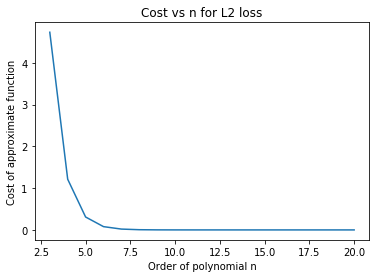

In [6]:
n_values = np.arange(3,21)

loss_L2 = [0]*len(n_values)

for i in range( len(n_values)):
    
    loss_L2[i],_ = function_approximator( n_values[i] ,N,loss = 'L2')

plt.plot(n_values,loss_L2)
plt.xlabel('Order of polynomial n')
plt.ylabel('Cost of approximate function')
plt.title("Cost vs n for L2 loss")

#  2. All the above exersizes with L1 loss

### 2.B Printing coeffiecients of approximator polynomial

In [7]:
#### N = 100 .. 201 points between [-1,1]
N = 100
n1,n2,n3 = 5,10,20
loss1,A1 = function_approximator(n1,N,loss = 'L1')

print(" ************  For n = %d  *************" %n1)
print("\ncost = %.4f" %loss1)
print("\nCoeff are : ")
print(A1)

print('\n<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>\n')

loss2,A2 = function_approximator(n2,N,loss = 'L1')

print(" ************  For n = %d  *************" %n2)
print("\ncost = %.4f" %loss2)
print("\nCoeff are : ")
print(A2)

print('\n<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>\n')

loss3,A3 = function_approximator(n3,N,loss = 'L1')
print(" ************  For n = %d  *************" %n3)
print("\ncost = %.4f" %loss3)
print("\nCoeff are : ")
print(A3)

print('\n<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>\n')


 ************  For n = 5  *************

cost = 6.4346

Coeff are : 
[[-1.67453555e-21]
 [-1.89225000e-01]
 [ 1.99424659e-17]
 [ 1.00690000e+00]
 [-1.12655331e-16]]

<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>

 ************  For n = 10  *************

cost = 0.2059

Coeff are : 
[[ 1.00281966e-03]
 [ 1.39090832e-17]
 [-6.16274578e-02]
 [-5.11125894e-16]
 [ 5.68114389e-01]
 [ 3.82760894e-15]
 [-1.79310458e+00]
 [-8.14183014e-15]
 [ 2.27569998e+00]
 [ 5.02120227e-15]]

<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>

 ************  For n = 20  *************

cost = 0.0002

Coeff are : 
[[-8.91604821e-07]
 [ 1.81180199e-08]
 [ 2.18101867e-04]
 [-7.45184120e-07]
 [-7.98336139e-03]
 [ 1.06807568e-05]
 [ 1.10555304e-01]
 [-7.54297147e-05]
 [-7.69125669e-01]
 [ 3.01751861e-04]
 [ 3.05242329e+00]
 [-7.28883514e-04]
 [-7.33809054e+00]
 [ 1.08359186e-03]
 [ 1.08754272e+01]
 [-9.69413917e-04]
 [-9.70873913e+00]
 [ 4.78547002e-04]
 [ 4.78530029e+00]
 [-1.00118821e-04

### 2.C Graph of loss vs n

Text(0.5, 1.0, 'Cost vs n for L1 loss')

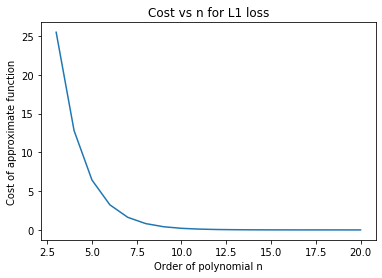

In [8]:
n_values = np.arange(3,21)

loss_L2 = [0]*len(n_values)

for i in range( len(n_values)):
    
    loss_L2[i],_ = function_approximator( n_values[i] ,N,loss = 'L1')

plt.plot(n_values,loss_L2)
plt.xlabel('Order of polynomial n')
plt.ylabel('Cost of approximate function')
plt.title("Cost vs n for L1 loss")

# The End